In [1]:
from numerapi import NumerAPI
import pandas as pd
import json
import numpy as np
import pandas as pd
import torch 
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [4]:
from numerapi import NumerAPI
import pandas as pd
import json

DATA_VERSION = "v4.3"

napi = NumerAPI()
# napi.download_dataset("v4.3/train_int8.parquet")
napi.download_dataset(f"{DATA_VERSION}/features.json");

feature_metadata = json.load(open(f"{DATA_VERSION}/features.json"))
feature_cols = feature_metadata["feature_sets"]["medium"]
target_cols = feature_metadata["targets"]
training_data = pd.read_parquet(
    f"{DATA_VERSION}/train_int8.parquet",
    columns=["era"] + feature_cols + target_cols
)

# training_data = training_data[training_data["era"].isin(training_data["era"].unique()[::4])]

training_data = training_data[-200000:]

training_data[["era"] + feature_cols]

2024-08-24 20:43:08,425 INFO numerapi.utils: target file already exists
2024-08-24 20:43:08,425 INFO numerapi.utils: download complete


,era,feature_abating_unadaptable_weakfish,feature_ablest_mauritanian_elding,feature_acclimatisable_unfeigned_maghreb,feature_accommodable_crinite_cleft,feature_accretive_sorrier_skedaddle,feature_acetose_periotic_coronation,feature_adam_incantational_winemaker,feature_additive_untrustworthy_hierologist,feature_adsorbed_blizzardy_burlesque,...,feature_witchy_orange_muley,feature_wombed_liberatory_malva,feature_won_stalwart_eisenstein,feature_wrathful_prolix_colotomy,feature_wrinkliest_unmaintainable_usk,feature_wrought_muckier_temporality,feature_yauld_antediluvial_subprefecture,feature_yelled_hysteretic_eath,feature_yoruban_unapplied_tawse,feature_zygodactyl_exponible_lathi
id,,,,,,,,,,,,,,,,,,,,,
n5f8a57de99437f2,0532,0,3,2,2,1,4,1,3,0,...,4,2,3,3,2,3,2,3,0,2
n5f8bfa4e18cd69c,0532,1,3,4,1,1,4,4,2,4,...,2,4,3,3,3,2,4,4,2,4
n5f96654e5056018,0532,4,0,0,0,3,3,4,0,0,...,1,2,0,0,4,2,1,2,3,0
n5fa44df552b3b92,0532,3,1,1,1,1,0,1,0,3,...,0,0,1,4,3,1,0,0,3,4
n5fac2e0e973e49a,0532,1,4,4,3,2,1,3,2,1,...,3,4,0,0,3,0,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nffcc1dbdf2212e6,0574,0,2,1,1,4,2,0,4,3,...,4,2,4,3,4,4,4,4,3,0
nffd71b7f6a128df,0574,4,3,0,0,0,0,2,0,0,...,0,0,0,0,4,0,2,1,4,0
nffde3b371d67394,0574,1,2,1,2,3,2,4,2,3,...,3,2,1,2,2,0,3,4,3,0


In [5]:
napi.download_dataset(f"{DATA_VERSION}/live_int8.parquet")

# Load live features
live_features = pd.read_parquet(f"{DATA_VERSION}/live_int8.parquet", columns=feature_cols)
live_features

2024-08-24 20:43:11,333 INFO numerapi.utils: target file already exists
2024-08-24 20:43:11,334 INFO numerapi.utils: download complete


,feature_abating_unadaptable_weakfish,feature_ablest_mauritanian_elding,feature_acclimatisable_unfeigned_maghreb,feature_accommodable_crinite_cleft,feature_accretive_sorrier_skedaddle,feature_acetose_periotic_coronation,feature_adam_incantational_winemaker,feature_additive_untrustworthy_hierologist,feature_adsorbed_blizzardy_burlesque,feature_affettuoso_taxidermic_greg,...,feature_witchy_orange_muley,feature_wombed_liberatory_malva,feature_won_stalwart_eisenstein,feature_wrathful_prolix_colotomy,feature_wrinkliest_unmaintainable_usk,feature_wrought_muckier_temporality,feature_yauld_antediluvial_subprefecture,feature_yelled_hysteretic_eath,feature_yoruban_unapplied_tawse,feature_zygodactyl_exponible_lathi
id,,,,,,,,,,,,,,,,,,,,,
n0017465a7a884ae,0,2,2,1,2,4,3,2,0,3,...,3,4,4,0,1,0,4,3,1,0
n0023062acf01351,0,3,0,4,4,0,1,0,4,0,...,0,0,0,1,4,1,0,2,3,1
n0031e9529abdd9c,1,1,2,1,4,1,2,4,3,2,...,4,0,4,1,4,3,4,4,3,2
n006340498edebe8,2,1,0,4,0,1,2,0,0,1,...,4,3,0,4,2,0,0,3,0,1
n0068ab432b5467b,4,4,4,4,3,3,1,4,4,4,...,2,3,3,1,1,4,2,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nffca66cd1e34ceb,2,1,1,4,0,4,0,4,0,1,...,0,4,1,4,4,4,2,1,4,0
nffe52d118b7e009,2,3,3,2,3,3,4,2,1,4,...,3,2,1,1,0,1,2,3,0,4
nffe8d3cc6463362,3,1,1,1,0,2,0,1,1,1,...,1,2,3,4,2,0,1,1,3,0


In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
corr_list = {}

for feature in feature_cols:
    correlation = training_data[feature].corr(training_data['target'])
    corr_list[feature] = correlation

l = list(corr_list.values())
l.sort(reverse=True)
vals = l[:40]

final_feature = []

for feature in corr_list:
    if (corr_list[feature] in vals):
        final_feature.append(feature)

final_feature

['feature_amoroso_wimpish_maturing',
 'feature_caudated_consuetudinary_bratislava',
 'feature_coactive_bandoleered_trogon',
 'feature_completive_pedantical_sinecurist',
 'feature_coordinated_astir_vituperation',
 'feature_deckled_exaggerative_algol',
 'feature_denuded_typed_wattmeter',
 'feature_distressed_bloated_disquietude',
 'feature_esculent_erotic_epoxy',
 'feature_expiscatory_wriest_colportage',
 'feature_festive_pewter_peeper',
 'feature_flawy_caller_superior',
 'feature_gobony_premonitory_twinkler',
 'feature_hardback_saturnalian_cyclometer',
 'feature_hunchbacked_unturning_meditation',
 'feature_inconsiderate_unbooted_ricer',
 'feature_laminable_unspecified_gynoecium',
 'feature_leaky_overloaded_rhodium',
 'feature_midmost_perspiratory_hubert',
 'feature_mythic_florentine_psammite',
 'feature_noctilucent_subcortical_proportionality',
 'feature_productile_auriform_fil',
 'feature_pruinose_raploch_roubaix',
 'feature_referenced_biliteral_chiropody',
 'feature_required_bibliolog

In [8]:
assert training_data["target"].equals(training_data["target_cyrus_v4_20"])
# target_names = target_cols[1:]
# targets_df = training_data[["era"] + target_names]
targets_df = training_data[["era","target"] + final_feature]
targets_df

,era,target,feature_amoroso_wimpish_maturing,feature_caudated_consuetudinary_bratislava,feature_coactive_bandoleered_trogon,feature_completive_pedantical_sinecurist,feature_coordinated_astir_vituperation,feature_deckled_exaggerative_algol,feature_denuded_typed_wattmeter,feature_distressed_bloated_disquietude,...,feature_tamil_grungy_empathy,feature_testicular_slashed_ventosity,feature_thousandth_hierarchal_plight,feature_tottery_unmetalled_codder,feature_tricksiest_pending_voile,feature_twelve_haphazard_pantography,feature_unnameable_abysmal_net,feature_unrecognisable_waxier_paging,feature_unsapped_anionic_catherine,feature_yelled_hysteretic_eath
id,,,,,,,,,,,,,,,,,,,,,
n5f8a57de99437f2,0532,0.50,1,0,1,3,2,2,2,1,...,2,2,2,4,3,2,3,1,3,3
n5f8bfa4e18cd69c,0532,0.50,0,1,2,3,4,4,4,3,...,4,4,0,3,0,4,3,2,2,4
n5f96654e5056018,0532,0.00,0,1,4,2,0,0,0,2,...,2,0,4,0,4,4,2,4,1,2
n5fa44df552b3b92,0532,0.50,3,2,2,3,0,0,0,2,...,1,0,1,1,1,2,3,2,3,0
n5fac2e0e973e49a,0532,0.50,4,4,0,4,1,1,4,1,...,2,4,1,0,1,3,4,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nffcc1dbdf2212e6,0574,0.75,0,1,4,4,3,3,2,4,...,4,2,2,3,2,0,4,4,4,4
nffd71b7f6a128df,0574,0.25,4,3,0,0,0,0,3,1,...,0,3,1,0,1,4,0,0,0,1
nffde3b371d67394,0574,0.25,3,2,2,2,0,0,0,4,...,4,0,2,3,2,4,2,1,3,4


In [9]:
from tqdm import tqdm

targets_df.sort_values(by=['era'], inplace=True)
features = [f for f in targets_df.columns if f!="target" and f!="era"]

# Xraw = targets_df.iloc[:50000,2:]
# yraw = targets_df.iloc[:50000,1]

Xraw = targets_df.iloc[:,2:]
yraw = targets_df.iloc[:,1]


def create_dataset_with_window(Xraw, yraw, window_len: int):

    Xraw_filled = Xraw.fillna(-1)
    yraw_filled = yraw.fillna(-1)
    
    new_data = []
    new_cols = []
    new_labels = []
    
    for col_idx in range(window_len):
        local_new_cols = [f"{col}_ts{col_idx}" for col in Xraw_filled.columns]
        new_cols.extend(local_new_cols)

    for start in tqdm(range(0, len(Xraw_filled) - window_len + 1), desc="Creating Dataset"):
        new_row_data = Xraw_filled.iloc[start : start + window_len].values.reshape(-1)
        new_label_data = yraw_filled.iloc[start + window_len - 1]
        new_data.append(new_row_data)
        new_labels.append(new_label_data)

    return pd.DataFrame(new_data, columns=new_cols).astype(float), pd.Series(new_labels).astype(float)


X, y = create_dataset_with_window(Xraw, yraw, window_len=100) 

Creating Dataset:   2%|▏         | 3544/199996 [00:00<00:05, 35430.40it/s]

Creating Dataset: 100%|██████████| 199996/199996 [00:04<00:00, 41185.28it/s]


In [10]:
y.unique()

array([0.5 , 0.25, 0.75, 1.  , 0.  ])

In [11]:
X_numpy = X.values
y_numpy = y.values

window_len = 5


feature_size = len(Xraw.columns)

X_reshaped = X_numpy.reshape(-1, window_len, feature_size)

X_tensor = torch.tensor(X_reshaped, dtype=torch.float32)
y_tensor = torch.tensor(y_numpy, dtype=torch.float32)

In [12]:
from torch.utils.data import TensorDataset, DataLoader

dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score
from tqdm import tqdm


class ClassificationLSTM(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size, lr):
        super(ClassificationLSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)
        self.optimizer = optim.Adam(self.parameters(), lr=lr)
        self.criterion = nn.CrossEntropyLoss()
        self.class_to_bucket = {0: 0, 1: 0.25, 2: 0.5, 3: 0.75, 4: 1}

        # Initialize history for tracking loss and f1_score
        self.history = {
            'loss': [],
            'f1_score': []
        }

    def forward(self, x):
        h, _ = self.lstm(x)  
        x = self.linear(h[:, -1, :]) 
        return x

    def train_model(self, train_loader, num_epochs, device):

        self.to(device)  # Move the model to the specified device
        
        for epoch in range(num_epochs):
    
            epoch_loss = 0
            all_preds = []
            all_labels = []

            for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
                inputs, labels = inputs.to(device), labels.to(device)  # Move inputs and labels to GPU
                
                self.optimizer.zero_grad()
                
                outputs = self(inputs)

                label_indices = torch.tensor([self.bucket_to_class(val) for val in labels.cpu().numpy()], dtype=torch.long).to(device)
                
                loss = self.criterion(outputs, label_indices)
                
                loss.backward()
                self.optimizer.step()
                
                epoch_loss += loss.item()

                preds = torch.argmax(outputs, dim=1)
                
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(label_indices.cpu().numpy())
            
            avg_loss = epoch_loss / len(train_loader)
            f1 = f1_score(all_labels, all_preds, average='macro')
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, F1 Score: {f1:.4f}")

            self.history['loss'].append(avg_loss)
            self.history['f1_score'].append(f1)
    
    def evaluate_model(self, test_loader, device):
        self.eval() 
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)  # Move inputs and labels to GPU
                outputs = self(inputs)
                preds = torch.argmax(outputs, dim=1)
                label_indices_for_f1 = torch.tensor([self.bucket_to_class(val) for val in labels.cpu().numpy()], dtype=torch.long).to(device)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(label_indices_for_f1.cpu().numpy())
        
        f1 = f1_score(all_labels, all_preds, average='macro')
        print(f"Test F1 Score: {f1:.4f}")

    def bucket_to_class(self, val):
        bucket_to_class = {v: k for k, v in self.class_to_bucket.items()}
        return bucket_to_class[val]

    def plot_training_history(self):

        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.plot(self.history['loss'], marker='o', label='Loss')
        plt.title('Training Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        

        plt.subplot(1, 2, 2)
        plt.plot(self.history['f1_score'], marker='o', label='F1 Score')
        plt.title('Training F1 Score')
        plt.xlabel('Epoch')
        plt.ylabel('F1 Score')
        plt.legend()
        
        plt.show()

Epoch 1/50: 100%|██████████| 6250/6250 [00:12<00:00, 493.77it/s]


Epoch [1/50], Loss: 1.2741, F1 Score: 0.1339


Epoch 2/50: 100%|██████████| 6250/6250 [00:12<00:00, 500.75it/s]


Epoch [2/50], Loss: 1.2642, F1 Score: 0.1368


Epoch 3/50: 100%|██████████| 6250/6250 [00:12<00:00, 500.49it/s]


Epoch [3/50], Loss: 1.2602, F1 Score: 0.1404


Epoch 4/50: 100%|██████████| 6250/6250 [00:12<00:00, 500.62it/s]


Epoch [4/50], Loss: 1.2565, F1 Score: 0.1456


Epoch 5/50: 100%|██████████| 6250/6250 [00:12<00:00, 501.87it/s]


Epoch [5/50], Loss: 1.2520, F1 Score: 0.1519


Epoch 6/50: 100%|██████████| 6250/6250 [00:12<00:00, 502.28it/s]


Epoch [6/50], Loss: 1.2472, F1 Score: 0.1599


Epoch 7/50: 100%|██████████| 6250/6250 [00:12<00:00, 501.82it/s]


Epoch [7/50], Loss: 1.2417, F1 Score: 0.1696


Epoch 8/50: 100%|██████████| 6250/6250 [00:12<00:00, 506.39it/s]


Epoch [8/50], Loss: 1.2353, F1 Score: 0.1814


Epoch 9/50: 100%|██████████| 6250/6250 [00:12<00:00, 505.85it/s]


Epoch [9/50], Loss: 1.2295, F1 Score: 0.1909


Epoch 10/50: 100%|██████████| 6250/6250 [00:12<00:00, 506.82it/s]


Epoch [10/50], Loss: 1.2226, F1 Score: 0.2030


Epoch 11/50: 100%|██████████| 6250/6250 [00:12<00:00, 509.45it/s]


Epoch [11/50], Loss: 1.2159, F1 Score: 0.2123


Epoch 12/50: 100%|██████████| 6250/6250 [00:12<00:00, 505.33it/s]


Epoch [12/50], Loss: 1.2087, F1 Score: 0.2269


Epoch 13/50: 100%|██████████| 6250/6250 [00:12<00:00, 500.01it/s]


Epoch [13/50], Loss: 1.2020, F1 Score: 0.2371


Epoch 14/50: 100%|██████████| 6250/6250 [00:12<00:00, 498.21it/s]


Epoch [14/50], Loss: 1.1943, F1 Score: 0.2483


Epoch 15/50: 100%|██████████| 6250/6250 [00:12<00:00, 499.62it/s]


Epoch [15/50], Loss: 1.1881, F1 Score: 0.2594


Epoch 16/50: 100%|██████████| 6250/6250 [00:12<00:00, 497.03it/s]


Epoch [16/50], Loss: 1.1811, F1 Score: 0.2684


Epoch 17/50: 100%|██████████| 6250/6250 [00:12<00:00, 500.19it/s]


Epoch [17/50], Loss: 1.1746, F1 Score: 0.2778


Epoch 18/50: 100%|██████████| 6250/6250 [00:12<00:00, 496.44it/s]


Epoch [18/50], Loss: 1.1686, F1 Score: 0.2875


Epoch 19/50: 100%|██████████| 6250/6250 [00:12<00:00, 497.08it/s]


Epoch [19/50], Loss: 1.1621, F1 Score: 0.2962


Epoch 20/50: 100%|██████████| 6250/6250 [00:12<00:00, 501.46it/s]


Epoch [20/50], Loss: 1.1562, F1 Score: 0.3029


Epoch 21/50: 100%|██████████| 6250/6250 [00:12<00:00, 497.67it/s]


Epoch [21/50], Loss: 1.1495, F1 Score: 0.3130


Epoch 22/50: 100%|██████████| 6250/6250 [00:12<00:00, 494.23it/s]


Epoch [22/50], Loss: 1.1444, F1 Score: 0.3212


Epoch 23/50: 100%|██████████| 6250/6250 [00:12<00:00, 500.62it/s]


Epoch [23/50], Loss: 1.1381, F1 Score: 0.3269


Epoch 24/50: 100%|██████████| 6250/6250 [00:12<00:00, 501.55it/s]


Epoch [24/50], Loss: 1.1327, F1 Score: 0.3343


Epoch 25/50: 100%|██████████| 6250/6250 [00:12<00:00, 507.40it/s]


Epoch [25/50], Loss: 1.1269, F1 Score: 0.3398


Epoch 26/50: 100%|██████████| 6250/6250 [00:12<00:00, 509.37it/s]


Epoch [26/50], Loss: 1.1214, F1 Score: 0.3475


Epoch 27/50: 100%|██████████| 6250/6250 [00:12<00:00, 510.61it/s]


Epoch [27/50], Loss: 1.1169, F1 Score: 0.3530


Epoch 28/50: 100%|██████████| 6250/6250 [00:12<00:00, 509.39it/s]


Epoch [28/50], Loss: 1.1114, F1 Score: 0.3586


Epoch 29/50: 100%|██████████| 6250/6250 [00:12<00:00, 502.73it/s]


Epoch [29/50], Loss: 1.1068, F1 Score: 0.3640


Epoch 30/50: 100%|██████████| 6250/6250 [00:12<00:00, 499.46it/s]


Epoch [30/50], Loss: 1.1023, F1 Score: 0.3671


Epoch 31/50: 100%|██████████| 6250/6250 [00:12<00:00, 499.62it/s]


Epoch [31/50], Loss: 1.0975, F1 Score: 0.3749


Epoch 32/50: 100%|██████████| 6250/6250 [00:12<00:00, 499.55it/s]


Epoch [32/50], Loss: 1.0933, F1 Score: 0.3775


Epoch 33/50: 100%|██████████| 6250/6250 [00:12<00:00, 504.74it/s]


Epoch [33/50], Loss: 1.0884, F1 Score: 0.3834


Epoch 34/50: 100%|██████████| 6250/6250 [00:12<00:00, 498.27it/s]


Epoch [34/50], Loss: 1.0842, F1 Score: 0.3882


Epoch 35/50: 100%|██████████| 6250/6250 [00:12<00:00, 500.15it/s]


Epoch [35/50], Loss: 1.0797, F1 Score: 0.3918


Epoch 36/50: 100%|██████████| 6250/6250 [00:12<00:00, 498.08it/s]


Epoch [36/50], Loss: 1.0762, F1 Score: 0.3943


Epoch 37/50: 100%|██████████| 6250/6250 [00:12<00:00, 495.88it/s]


Epoch [37/50], Loss: 1.0718, F1 Score: 0.3997


Epoch 38/50: 100%|██████████| 6250/6250 [00:12<00:00, 495.65it/s]


Epoch [38/50], Loss: 1.0683, F1 Score: 0.4015


Epoch 39/50: 100%|██████████| 6250/6250 [00:12<00:00, 494.68it/s]


Epoch [39/50], Loss: 1.0646, F1 Score: 0.4070


Epoch 40/50: 100%|██████████| 6250/6250 [00:12<00:00, 493.97it/s]


Epoch [40/50], Loss: 1.0606, F1 Score: 0.4105


Epoch 41/50: 100%|██████████| 6250/6250 [00:12<00:00, 493.10it/s]


Epoch [41/50], Loss: 1.0570, F1 Score: 0.4143


Epoch 42/50: 100%|██████████| 6250/6250 [00:12<00:00, 495.73it/s]


Epoch [42/50], Loss: 1.0536, F1 Score: 0.4177


Epoch 43/50: 100%|██████████| 6250/6250 [00:12<00:00, 498.68it/s]


Epoch [43/50], Loss: 1.0503, F1 Score: 0.4210


Epoch 44/50: 100%|██████████| 6250/6250 [00:12<00:00, 500.46it/s]


Epoch [44/50], Loss: 1.0474, F1 Score: 0.4246


Epoch 45/50: 100%|██████████| 6250/6250 [00:12<00:00, 496.84it/s]


Epoch [45/50], Loss: 1.0438, F1 Score: 0.4261


Epoch 46/50: 100%|██████████| 6250/6250 [00:12<00:00, 498.87it/s]


Epoch [46/50], Loss: 1.0411, F1 Score: 0.4288


Epoch 47/50: 100%|██████████| 6250/6250 [00:12<00:00, 501.43it/s]


Epoch [47/50], Loss: 1.0377, F1 Score: 0.4322


Epoch 48/50: 100%|██████████| 6250/6250 [00:12<00:00, 499.25it/s]


Epoch [48/50], Loss: 1.0351, F1 Score: 0.4328


Epoch 49/50: 100%|██████████| 6250/6250 [00:12<00:00, 499.00it/s]


Epoch [49/50], Loss: 1.0326, F1 Score: 0.4359


Epoch 50/50: 100%|██████████| 6250/6250 [00:12<00:00, 496.16it/s]


Epoch [50/50], Loss: 1.0287, F1 Score: 0.4396


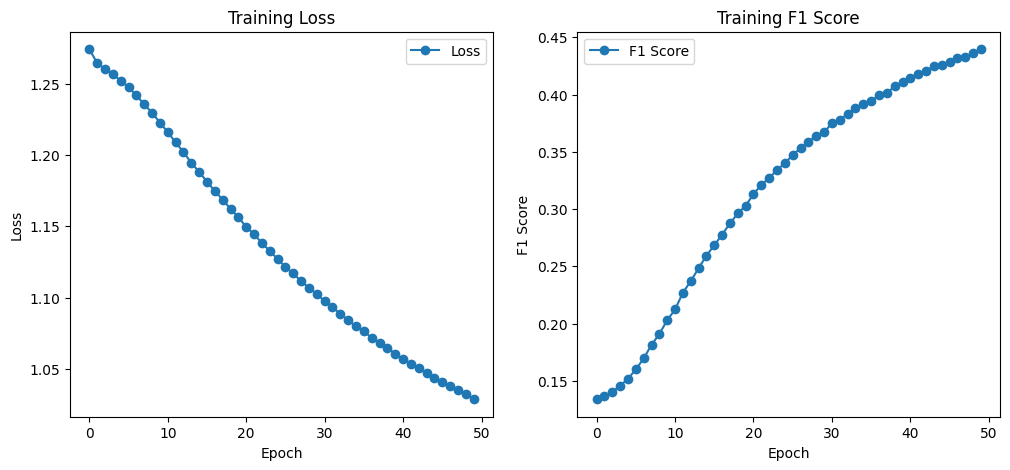

In [14]:

from torch.utils.data import TensorDataset, DataLoader


dataset = TensorDataset(X_tensor, y_tensor)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

input_size = X_tensor.shape[2]  
hidden_size = 128  
output_size = 5 
lr = 0.001
num_epochs = 50

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ClassificationLSTM(input_size=input_size, hidden_size=hidden_size, output_size=output_size, lr=lr)

model.train_model(train_loader, num_epochs,device=device)
model.plot_training_history()

In [15]:
napi.download_dataset(f"{DATA_VERSION}/validation_int8.parquet");

validation = pd.read_parquet(
    f"{DATA_VERSION}/validation_int8.parquet",
    columns=["era", "data_type"] + feature_cols + target_cols
)
validation = validation[validation["data_type"] == "validation"]
del validation["data_type"]


2024-08-24 20:57:07,029 INFO numerapi.utils: target file already exists
2024-08-24 20:57:07,030 INFO numerapi.utils: download complete


In [16]:
validation = validation[['era','target'] + final_feature]

In [17]:
validation = validation[validation["era"].isin(validation["era"].unique()[::4])]

last_train_era = int(training_data["era"].unique()[-1])
eras_to_embargo = [str(era).zfill(4) for era in [last_train_era + i for i in range(4)]]
validation = validation[~validation["era"].isin(eras_to_embargo)]

In [18]:
validation_df = validation

In [19]:
# validation_df = validation[['era'] + final_feature]

validation_df.sort_values(by=['era'], inplace=True)
# features = [f for f in validation_df.columns if f!="target" and f!="era"]
window_len = 5
# window_len = 100

Xtest = validation_df.iloc[:,2:]
ytest = validation_df.iloc[:,1]

def preprocess_validation_data(validation_df, window_len, features):
    Xraw = validation_df[features]
    Xraw_filled = Xraw.fillna(-1)

    new_data = []

    # Pad the start of the data with the same number of missing values as window_len - 1
    padding = torch.full((window_len - 1, len(features)), -1)  # -1 for padding
    Xraw_padded = torch.cat((padding, torch.tensor(Xraw_filled.values, dtype=torch.float32)))

    for start in range(0, len(Xraw_filled)):
        new_row_data = Xraw_padded[start : start + window_len].reshape(window_len, len(features))
        new_data.append(new_row_data)

    return torch.stack(new_data)


# X_val = preprocess_validation_data(validation_df,window_len,features)
X_val = preprocess_validation_data(validation_df,window_len,final_feature)

In [20]:
X_val.shape

torch.Size([696205, 5, 40])

In [23]:
with torch.no_grad():
    outputs = model(X_val)
    predictions = torch.argmax(outputs, dim=1)  
    predictions = predictions.numpy()

In [24]:
bucket_to_class = {0: 0, 0.25: 1, 0.5: 2, 0.75: 3, 1: 4}

y_val_class_indices = ytest.map(bucket_to_class)

f1 = f1_score(y_val_class_indices, predictions, average='macro')
print(f"Validation F1 Score: {f1:.4f}")

Validation F1 Score: 0.2012


In [25]:
live_features_df = live_features[final_feature]
live_features_df

,feature_amoroso_wimpish_maturing,feature_caudated_consuetudinary_bratislava,feature_coactive_bandoleered_trogon,feature_completive_pedantical_sinecurist,feature_coordinated_astir_vituperation,feature_deckled_exaggerative_algol,feature_denuded_typed_wattmeter,feature_distressed_bloated_disquietude,feature_esculent_erotic_epoxy,feature_expiscatory_wriest_colportage,...,feature_tamil_grungy_empathy,feature_testicular_slashed_ventosity,feature_thousandth_hierarchal_plight,feature_tottery_unmetalled_codder,feature_tricksiest_pending_voile,feature_twelve_haphazard_pantography,feature_unnameable_abysmal_net,feature_unrecognisable_waxier_paging,feature_unsapped_anionic_catherine,feature_yelled_hysteretic_eath
id,,,,,,,,,,,,,,,,,,,,,
n0017465a7a884ae,0,3,1,0,4,4,1,4,1,1,...,1,0,1,1,1,0,0,1,1,3
n0023062acf01351,1,0,4,0,0,0,1,1,1,2,...,4,1,0,4,0,4,0,4,1,2
n0031e9529abdd9c,1,0,3,3,2,2,0,1,1,1,...,2,0,1,3,1,1,3,4,1,4
n006340498edebe8,2,0,3,0,3,2,4,2,0,4,...,2,3,3,0,3,0,1,3,1,3
n0068ab432b5467b,4,2,1,3,0,0,1,2,4,2,...,4,1,0,4,0,0,3,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nffca66cd1e34ceb,0,1,3,0,0,0,4,2,0,4,...,4,4,2,0,2,0,1,3,0,1
nffe52d118b7e009,3,2,1,1,3,3,4,3,1,2,...,1,4,4,2,4,3,1,1,2,3
nffe8d3cc6463362,1,2,1,0,3,3,3,0,0,0,...,0,2,4,2,4,0,0,1,0,1


In [26]:
window_len = 5

X_live = live_features_df.iloc[:,2:]

def preprocess_validation_data(validation_df, window_len, features):
    Xraw = validation_df[features]
    Xraw_filled = Xraw.fillna(-1)

    new_data = []


    padding = torch.full((window_len - 1, len(features)), -1) 
    Xraw_padded = torch.cat((padding, torch.tensor(Xraw_filled.values, dtype=torch.float32)))

    for start in range(0, len(Xraw_filled)):
        new_row_data = Xraw_padded[start : start + window_len].reshape(window_len, len(features))
        new_data.append(new_row_data)

    return torch.stack(new_data)


X_live = preprocess_validation_data(live_features_df,window_len,final_feature)

In [39]:
# with torch.no_grad():
#     outputs = model(X_live)
#     predictions = torch.argmax(outputs, dim=1)  # Get the class index with the highest score
#     predictions = predictions.numpy()
with torch.no_grad():
    outputs = model(X_live)
    if torch.isnan(outputs).any():
        outputs = torch.where(torch.isnan(outputs), torch.tensor(0.5, device=outputs.device), outputs)

    predictions = torch.argmax(outputs, dim=1)
    predictions = predictions.numpy()

In [44]:
predictions = list(predictions)

live_mapping = {0:0,1:0.25,2:0.5,3:0.75,4:1}

predictions_submission= {}

ctr = 0
for idx,row in live_features_df.iterrows():
    predictions_submission[idx] = live_mapping[predictions[ctr]]
    ctr += 1

submission = pd.Series(predictions_submission,index=live_features.index)

id
n0017465a7a884ae    1.00
n0023062acf01351    0.25
n0031e9529abdd9c    0.75
n006340498edebe8    0.50
n0068ab432b5467b    0.75
                    ... 
nffca66cd1e34ceb    0.25
nffe52d118b7e009    0.50
nffe8d3cc6463362    0.50
nffeb65dfdf78a06    0.75
nfff76da27dafb7e    0.50
Length: 4896, dtype: float64

In [50]:
def predict(live_features: pd.DataFrame) -> pd.DataFrame:

    Xraw = live_features[final_feature]
    Xraw_filled = Xraw.fillna(-1)

    new_data = []

    window_len = 5

    padding = torch.full((window_len - 1, len(final_feature)), -1) 
    Xraw_padded = torch.cat((padding, torch.tensor(Xraw_filled.values, dtype=torch.float32)))

    for start in range(0, len(Xraw_filled)):
        new_row_data = Xraw_padded[start : start + window_len].reshape(window_len, len(final_feature))
        new_data.append(new_row_data)

    X_live = torch.stack(new_data)

    with torch.no_grad():
        outputs = model(X_live)
        if torch.isnan(outputs).any():
            outputs = torch.where(torch.isnan(outputs), torch.tensor(0.5, device=outputs.device), outputs)

        predictions = torch.argmax(outputs, dim=1)
        predictions = predictions.numpy()

    live_mapping = {0:0,1:0.25,2:0.5,3:0.75,4:1}

    predictions_submission= {}

    ctr = 0
    for idx,row in live_features.iterrows():
        predictions_submission[idx] = live_mapping[predictions[ctr]]
        ctr += 1

    submission = pd.Series(predictions_submission,index=live_features.index)
    return submission.to_frame("prediction")

In [51]:
import cloudpickle
p = cloudpickle.dumps(predict)
with open("predict.pkl", "wb") as f:
    f.write(p)

In [52]:
try:
    from google.colab import files
    files.download('predict.pkl')
except:
    pass